# Heatmap
- Displays the Effect Size of hidden features accross all 25 encoders

    Encoders 1 to 25
    --> 
     _ _ _ _ _ _ _ _ _
v    | 
e    |
c    |
1024 |

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from helper_scripts.Constants import *
from matplotlib.colors import ListedColormap

# 1) Load in Dialect, Encoder, Token Data

In [70]:
PATH_TO_ALL_CD = "../data/cd_comparisons/CDs_D_E_T_"
vowels = "eh_ey"
ext = ".npy"
CDs_D_E_T = np.load(PATH_TO_ALL_CD+vowels+ext)

# 2) Accumulate Sum of Cohen's D for each encoder and each feature

In [71]:
# CDs_D_E_T = np.zeros((25,1024,8,tn))
acc_effect_size_by_dialect = dict()

for dialect in range(Constants.TIMIT.NUM_DIALECTS):
    all_effect_sizes = CDs_D_E_T[:, :, dialect, :]
    significant_mask = np.abs(all_effect_sizes) > 0.5
    acc_effect_size_count = np.sum(significant_mask, axis=2)
    acc_effect_size_by_dialect[dialect] = acc_effect_size_count

# 3) Plot

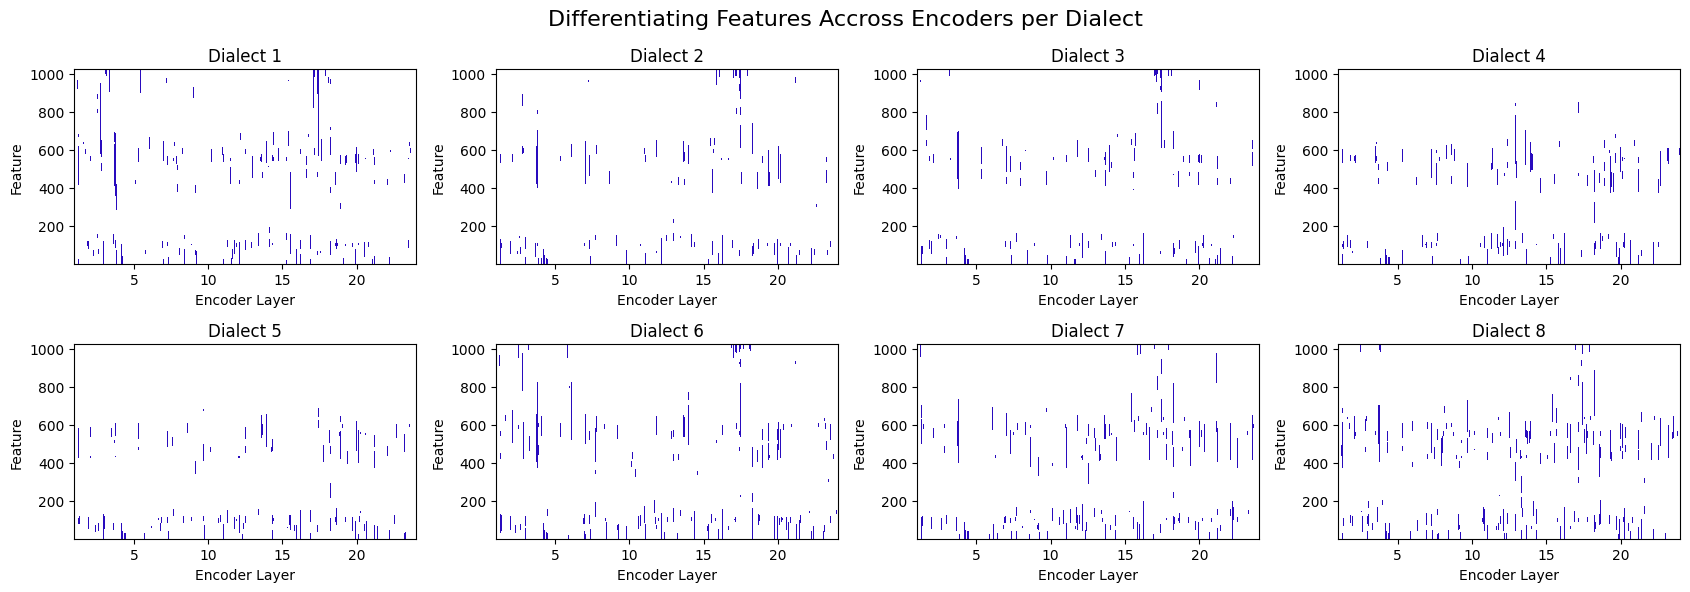

In [72]:
# Step 1) Generate axes (Shift indexes up by 1)
encoder_axis = np.arange(1, 25)
effect_size_axis = np.arange(1, 1025)

# Step 2) Generate Grid structure
# 14 by 6 is a generic size, change as needed
figs, axs = plt.subplots(2, 4, figsize=(17, 6))

# Step 3) Plot Data and Label Axis
plot_num = 0
for row in range(2):
    for col in range(4):
        # Setup Subplot
        cur_plot = axs[row, col]

        # Labelling
        cur_plot.set_title(f"Dialect {plot_num+1}")
        cur_plot.set_xlabel("Encoder Layer")
        cur_plot.set_ylabel("Feature")

        # White for zero, Blue for non-zero
        cmap_colors = [(1, 1, 1), (215, 245, 66)]
        cmap = ListedColormap(cmap_colors)

        # Plot Data
        cur_plot.imshow(
            acc_effect_size_by_dialect[plot_num],
            aspect="auto",
            extent=[encoder_axis.min(), encoder_axis.max(
            ), effect_size_axis.min(), effect_size_axis.max()],
            cmap=cmap
        )

        plot_num += 1

figs.suptitle(
    "Differentiating Features Accross Encoders per Dialect", fontsize=16)
plt.tight_layout()

# 4) Get Distinguishing Features Accross All Encoders

In [73]:
cross_dialect_distinguishable_features_idxs = set()
for dialect, acc_effect_size_count in acc_effect_size_by_dialect.items():
    # Get a Mask of dim=1024 where the index is True iff feature is differentiable accross all 25 encoders
    distinguish_mask = np.all(acc_effect_size_count, axis=0)

    # Get Distinguishable features
    distinguishable_idxs = np.argwhere(distinguish_mask == True).flatten()

    # Track features accross dialects
    if not cross_dialect_distinguishable_features_idxs:
        cross_dialect_distinguishable_features_idxs.update(distinguishable_idxs)
    else:
        cross_dialect_distinguishable_features_idxs.intersection_update(distinguishable_idxs)

    print(f"DR{dialect}: {distinguishable_idxs.shape[0]} distinguishable features")

print(f"{len(cross_dialect_distinguishable_features_idxs)} Distinguishable Features: {cross_dialect_distinguishable_features_idxs}")

DR0: 7 distinguishable features
DR1: 7 distinguishable features
DR2: 4 distinguishable features
DR3: 9 distinguishable features
DR4: 7 distinguishable features
DR5: 5 distinguishable features
DR6: 8 distinguishable features
DR7: 8 distinguishable features
3 Distinguishable Features: {194, 26, 236}
